# Proyek Analisis Data: [Nongzhanguan-AirQuality_Dataset]
- **Nama:** [Komang Satya Permadi]
- **Email:** [satyaintershuty@gmail.com]
- **ID Dicoding:** [satyapermadi]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh konsentrasi NO2 dan CO sebagai polutan yang dihasilkan kendaraan bermotor terhadap kualitas udara?
- Pertanyaan 2: Bagaimana pengaruh hujan terhadap polutan penyebab polusi udara?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
df_Nongzhanguan = pd.read_csv("https://raw.githubusercontent.com/satya-permadi/dicoding_airquality-project/refs/heads/main/AirQuality_Dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

In [4]:
df_Nongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Dataset diunduh dari Dicoding dan diunggah ke Github

### Assessing Data

Missing Value

In [5]:
print('\nDataframe Nongzhanguan:')
print(df_Nongzhanguan.isna().sum())


Dataframe Nongzhanguan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


Setalah analisis missing value (nilai yang hilang atau kosong) dilakukan masih terdapat kolom-kolom tertentu yang perlu diminimalisir melalui proses selanjutnya

Duplikasi Data

In [6]:
print('Dataframe Nongzhanguan:', df_Nongzhanguan.duplicated().sum())

Dataframe Nongzhanguan: 0


Nilai yang Jauh Berbeda (Outlier)

In [7]:
def identify_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers_Nongzhanguan_iqr = identify_outliers_iqr(df_Nongzhanguan.select_dtypes(include=[np.number]))

print("Outliers in df_Nongzhanguan (IQR):\n", df_Nongzhanguan[outliers_Nongzhanguan_iqr])

Outliers in df_Nongzhanguan (IQR):
           No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    5.0   14.0   4.0  12.0   200.0  85.0   
2          3  2013      3    1     2    3.0    6.0   5.0  14.0   200.0  83.0   
3          4  2013      3    1     3    5.0    5.0   5.0  14.0   200.0  84.0   
8          9  2013      3    1     8    3.0    6.0  13.0  49.0   400.0  46.0   
9         10  2013      3    1     9   11.0   14.0   9.0  28.0   400.0  68.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34893  34894  2017      2   21    21   78.0   78.0   4.0  52.0  1200.0   7.0   
34894  34895  2017      2   21    22   52.0   52.0   4.0  32.0   900.0  27.0   
34895  34896  2017      2   21    23   53.0   53.0   5.0  26.0   100.0  31.0   
35021  35022  2017      2   27     5  124.0  175.0  21.0  92.0  3400.0   6.0   
35028  35029  2017      2   27    12  126.0  697.0  41.0  95.0  2400.0  23.0   

   

Visualisasi Kumpulan Data (Box Plot) pada Outlier

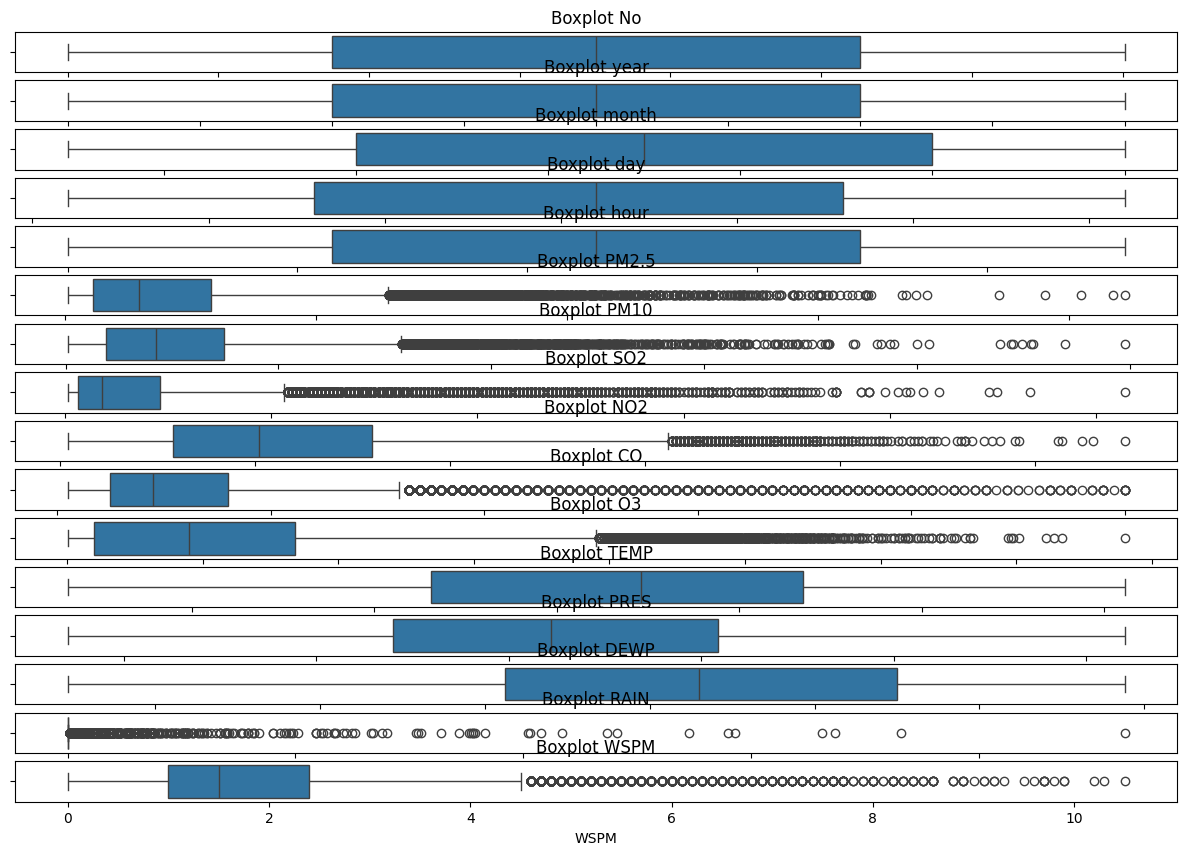

In [8]:
numeric_columns = df_Nongzhanguan.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df_Nongzhanguan[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.show()

### Cleaning Data

Pengisian (Imputasi) pada Data Kosong (Missing Value)
Imputasi Isi Nilai Hilang dengan Mean

Pemisahan Kolom Numerik dari Kolom Non-Numerik

In [9]:
numeric_columns_Nongzhanguan = df_Nongzhanguan.select_dtypes(include=[np.number])
non_numeric_columns_Nongzhanguan = df_Nongzhanguan.select_dtypes(exclude=[np.number])

Imputasi untuk kolom numerik

In [10]:
numeric_columns_Nongzhanguan.fillna(numeric_columns_Nongzhanguan.mean(), inplace=True)

Imputasi untuk kolom non-numerik

In [11]:
non_numeric_columns_Nongzhanguan.fillna(non_numeric_columns_Nongzhanguan.mode().iloc[0], inplace=True)

Penggabungan kolom numerik dan non-numerik

In [12]:
df_Nongzhanguan_final = pd.concat([numeric_columns_Nongzhanguan, non_numeric_columns_Nongzhanguan], axis=1)

Hasil nilai yang Hilang (Missing Value) setelah Dilakukan Proses Imputasi

In [13]:
print("Nilai yang hilang di df_Nongzhanguan_final:\n", df_Nongzhanguan_final.isnull().sum())

Nilai yang hilang di df_Nongzhanguan_final:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
wd         0
station    0
dtype: int64


Setelah menemukan Nilai yang jauh berbeda (Outlier), maka selanjutnya perlu dilakukan proses mengganti Nilai-Nilai ekstrem dalam data dengan nilai-nilai yang terkait dengan rentang persentil yang dipilih (Winsorization)

In [14]:
def apply_winsorizing(df, lower_quantile=0.05, upper_quantile=0.95):
    df_winsorized = df.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            lower_limit = df[column].quantile(lower_quantile)
            upper_limit = df[column].quantile(upper_quantile)
            df_winsorized[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df_winsorized

df_Nongzhanguan_winsorized = apply_winsorizing(df_Nongzhanguan)

Untuk mengetahui keberlanjutan Outlier maka perlu dibuat visualisasi data (Box Plot) seperti berikut:

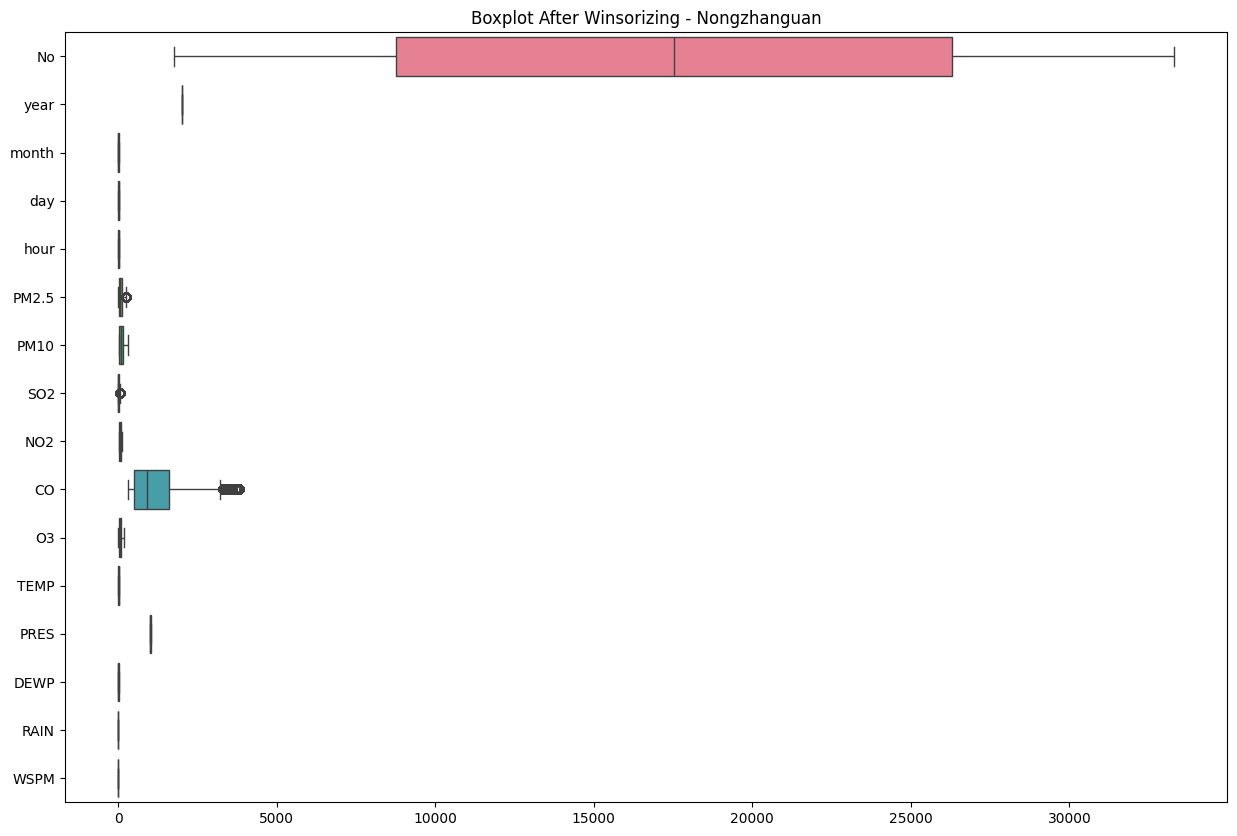

In [15]:
def plot_boxplots_winsorized(df, title, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, orient='h')
    plt.title(f'Boxplot After Winsorizing - {title}')
    plt.show()

plot_boxplots_winsorized(df_Nongzhanguan_winsorized, 'Nongzhanguan')

Penjelasan Tipe Data pada Dataset

In [16]:
df_Nongzhanguan['date_time'] = pd.to_datetime(df_Nongzhanguan[['year', 'month', 'day', 'hour']])

print(df_Nongzhanguan.dtypes)

No                    int64
year                  int64
month                 int64
day                   int64
hour                  int64
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
date_time    datetime64[ns]
dtype: object


Penggabungan Data

In [17]:
df_all = pd.concat([df_Nongzhanguan])

Melakukan Konversi dari kolom date_time ke tipe datetime

In [18]:
df_all['date_time'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

## Exploratory Data Analysis (EDA)

Analisis Deskriptif

In [19]:
print(df_all.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
min        2.000000      2.000000      0.571200    

Pemeriksaan Nilai Hilang (Missing Values)

In [20]:
print(df_all.isnull().sum())

No              0
year            0
month           0
day             0
hour            0
PM2.5         628
PM10          440
SO2           446
NO2           692
CO           1206
O3            506
TEMP           20
PRES           20
DEWP           20
RAIN           20
wd             78
WSPM           14
station         0
date_time       0
dtype: int64


Penghapusan Nilai Hilang (Drop Missing Values)

In [21]:
df_all= df_all.dropna()

Penghitungan baris dengan index duplikat

In [22]:
print(df_all.index.duplicated().sum())

0


Mendeteksi kolom duplikat

In [23]:
print(df_all.columns[df_all.columns.duplicated()])

Index([], dtype='object')


In [24]:
df_all = df_all.loc[:, ~df_all.columns.duplicated()]

In [25]:
df_all.to_csv('clean_df_all.csv', index=False)

Hubungan Angin dengan Persebaran PM2.5 melalui Visualisasi Data (Scatterplot)

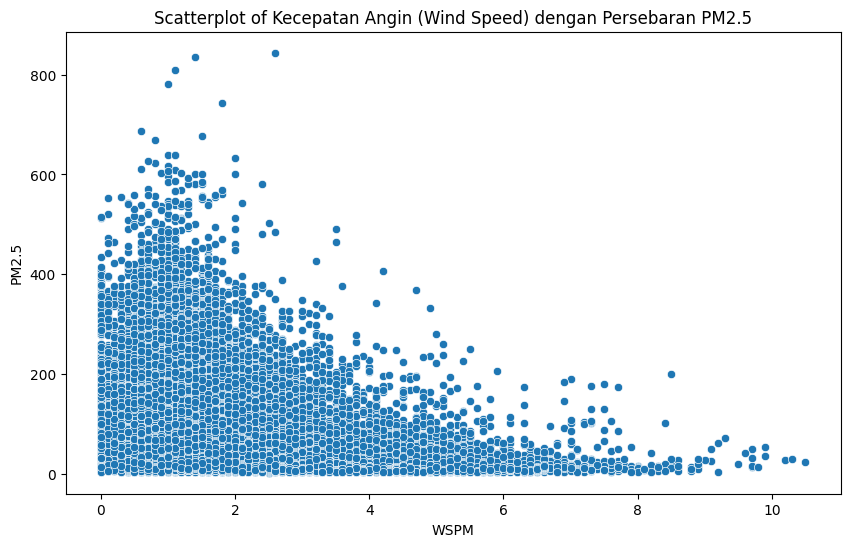

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=df_all)
plt.title('Scatterplot of Kecepatan Angin (Wind Speed) dengan Persebaran PM2.5')
plt.show()

Korelasi antara Variabel dengan Visualisasi Data (Heatmap)

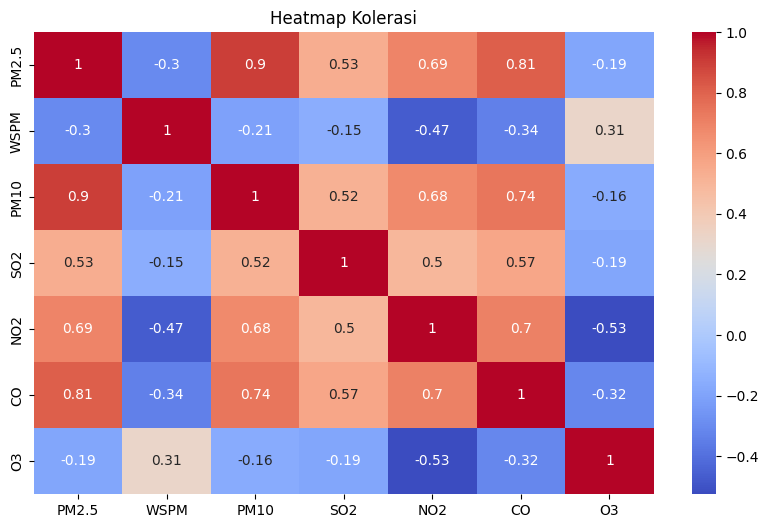

In [27]:
corr_matrix = df_all[['PM2.5', 'WSPM', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Kolerasi')
plt.show()

Tingkat Konsentrasi Polutan dari Kendaraan Bermotor atau Bahan Bakar Fosil (CO & NO2) dengan Visualisasi Data Lineplot

<ipython-input-30-72306b5f619c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_subset = df_all[['date_time', 'CO', 'NO2']].resample('M', on='date_time').mean().reset_index()


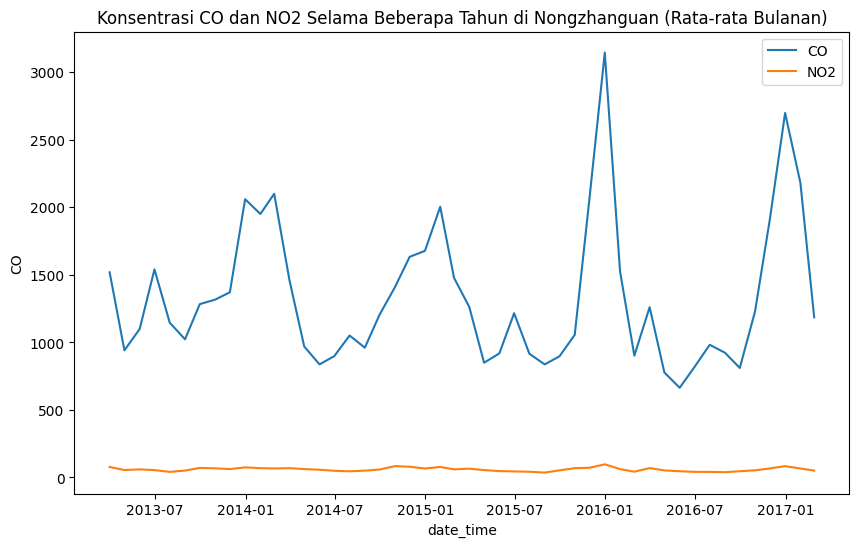

In [30]:
df_subset = df_all[['date_time', 'CO', 'NO2']].resample('M', on='date_time').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_time', y='CO', data=df_subset, label='CO')
sns.lineplot(x='date_time', y='NO2', data=df_subset, label='NO2')
plt.title('Konsentrasi CO dan NO2 Selama Beberapa Tahun di Nongzhanguan (Rata-rata Bulanan)')
plt.legend()
plt.show()

Hubungan antara Hujan dengan Tingkat Polutan dengan Visualisasi Data (Box Plot)

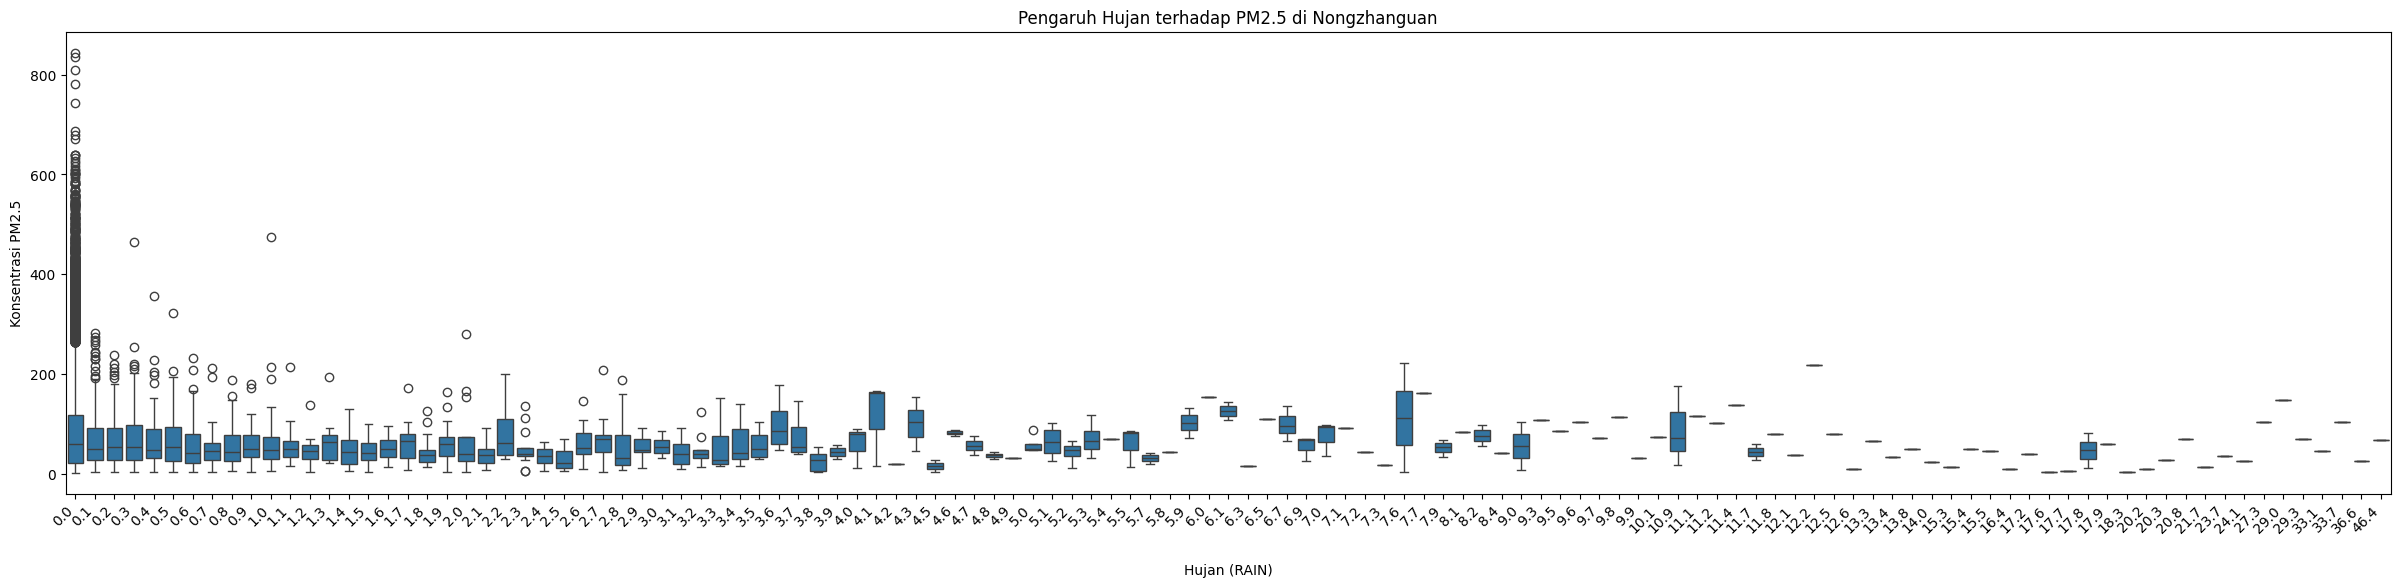

In [32]:
df_all = df_all.reset_index(drop=True)
plt.figure(figsize=(30, 6))
sns.boxplot(x='RAIN', y='PM2.5', data=df_all)
plt.title('Pengaruh Hujan terhadap PM2.5 di Nongzhanguan')
plt.xlabel('Hujan (RAIN)', labelpad=20)
plt.ylabel('Konsentrasi PM2.5')


plt.xticks(rotation=45, ha='right')

plt.show()

Hubungan Polutan NO2 dan CO dengan O3 di Nongzhanguan

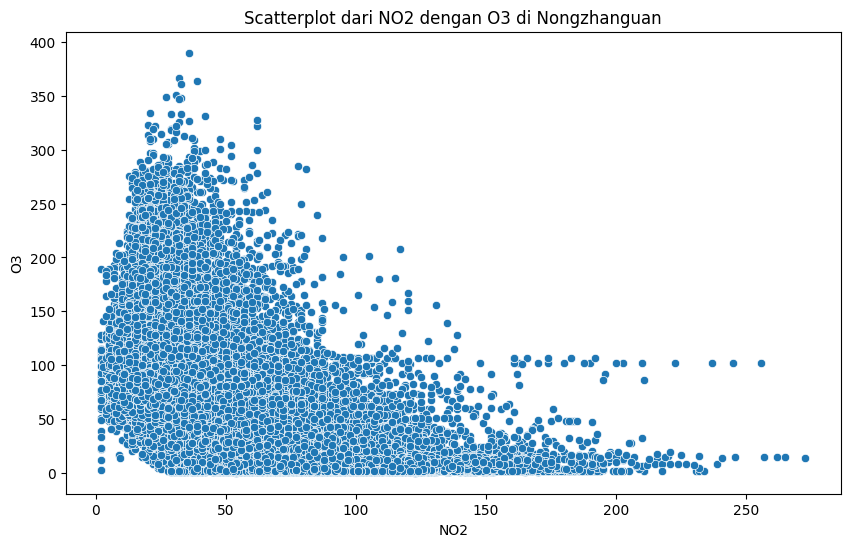

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='O3', data=df_all)
plt.title('Scatterplot dari NO2 dengan O3 di Nongzhanguan')
plt.show()

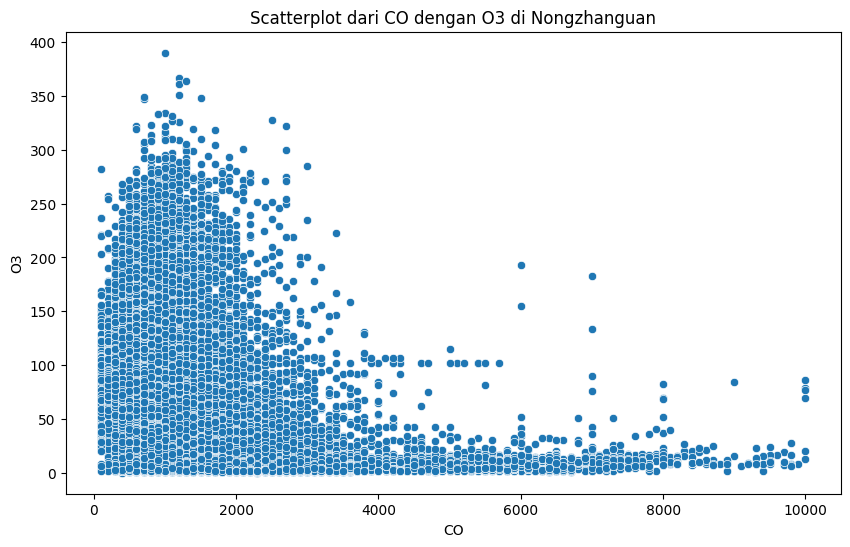

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO', y='O3', data=df_all)
plt.title('Scatterplot dari CO dengan O3 di Nongzhanguan')
plt.show()

Korelasi khusus pada O3 dengan Polutan Lain dengan menggunakan Visualisasi Data (Heatmap)

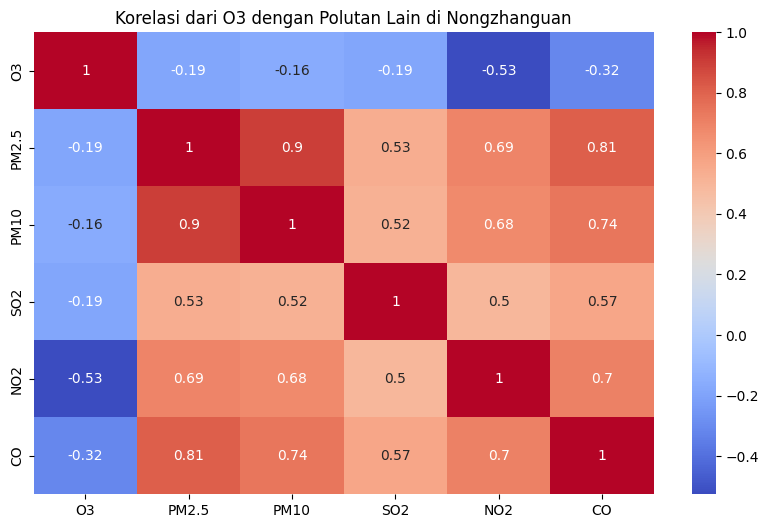

In [36]:
corr_matrix_O3 = df_all[['O3', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_O3, annot=True, cmap='coolwarm')
plt.title('Korelasi dari O3 dengan Polutan Lain di Nongzhanguan')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertanyaan 1: Bagaimana pengaruh konsentrasi NO2 dan CO sebagai polutan yang dihasilkan kendaraan bermotor terhadap kualitas udara di Nongzhanguan?

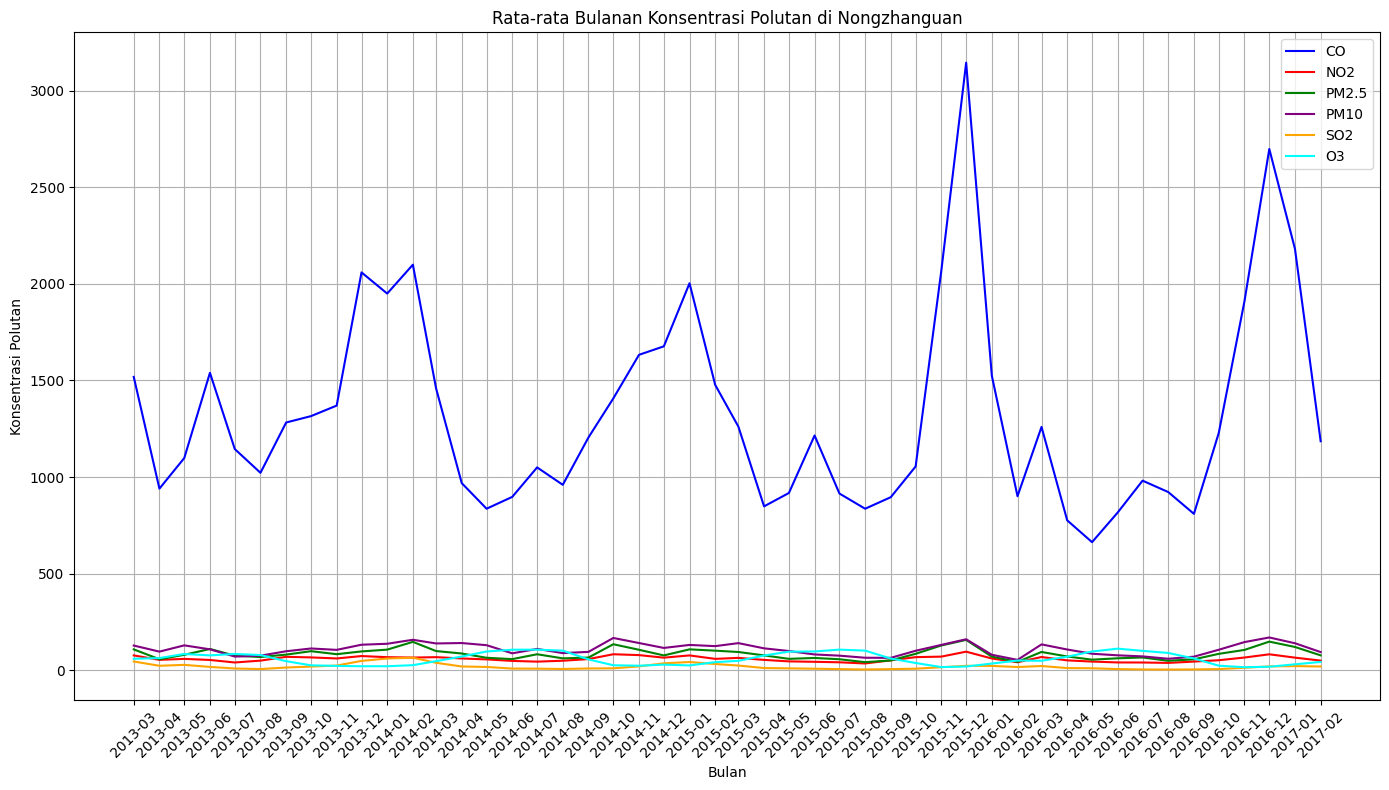

In [42]:
df_all['date_time_month'] = df_all['date_time'].dt.to_period('M')

monthly_avg = df_all.groupby('date_time_month').agg({
    'CO': 'mean',
    'NO2': 'mean',
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'O3': 'mean'
}).reset_index()

monthly_avg['date_time_month'] = monthly_avg['date_time_month'].dt.to_timestamp()

plt.figure(figsize=(14, 8))

sns.lineplot(x='date_time_month', y='CO', data=monthly_avg, label='CO', color='blue')
sns.lineplot(x='date_time_month', y='NO2', data=monthly_avg, label='NO2', color='red')
sns.lineplot(x='date_time_month', y='PM2.5', data=monthly_avg, label='PM2.5', color='green')
sns.lineplot(x='date_time_month', y='PM10', data=monthly_avg, label='PM10', color='purple')
sns.lineplot(x='date_time_month', y='SO2', data=monthly_avg, label='SO2', color='orange')
sns.lineplot(x='date_time_month', y='O3', data=monthly_avg, label='O3', color='cyan')

plt.title('Rata-rata Bulanan Konsentrasi Polutan di Nongzhanguan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')

plt.xticks(ticks=monthly_avg['date_time_month'], labels=monthly_avg['date_time_month'].dt.strftime('%Y-%m'), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Bagaimana pengaruh hujan terhadap polutan penyebab polusi udara di Nongzhanguan?

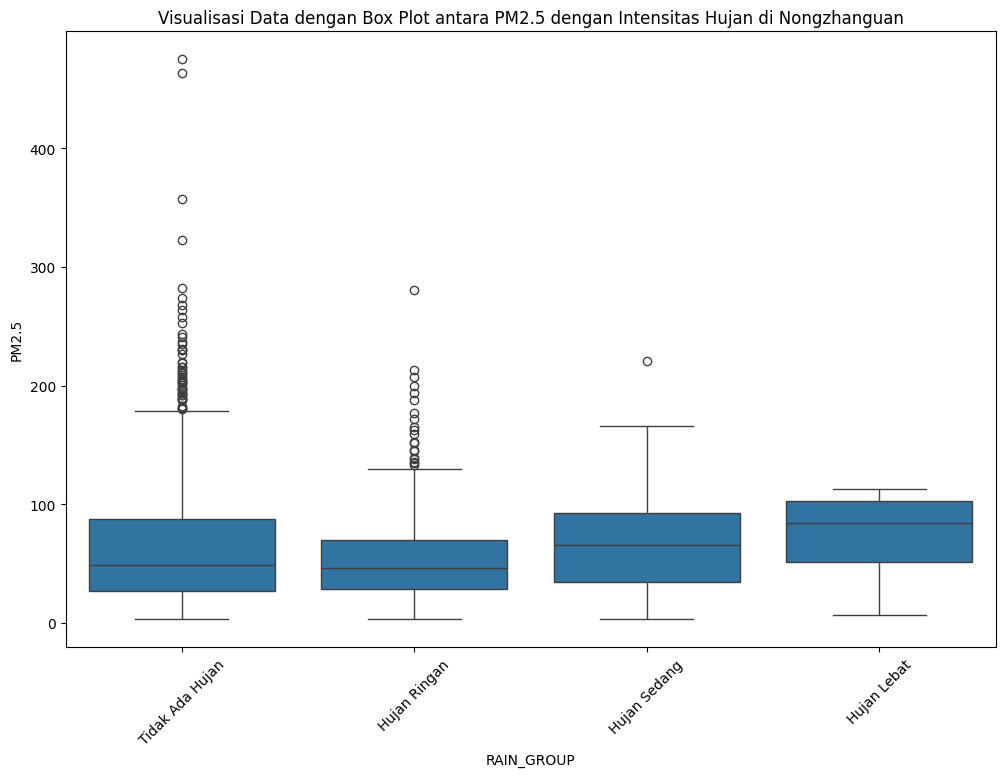

In [43]:
df_all['RAIN_GROUP'] = pd.cut(df_all['RAIN'], bins=[0, 1, 4, 8, 10], labels=['Tidak Ada Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='RAIN_GROUP', y='PM2.5', data=df_all)
plt.title('Visualisasi Data dengan Box Plot antara PM2.5 dengan Intensitas Hujan di Nongzhanguan')
plt.xticks(rotation=45)
plt.show()

<ipython-input-44-15544c42177b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_group_avg = df_all.groupby('RAIN_GROUP')['PM2.5'].mean().reset_index()


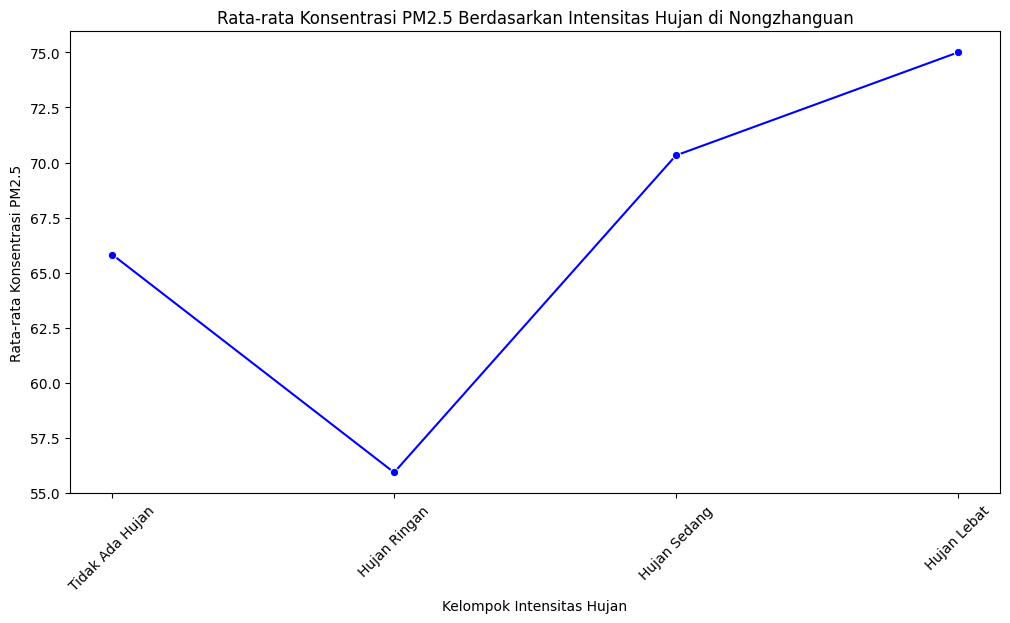

In [44]:
df_all['RAIN_GROUP'] = pd.cut(df_all['RAIN'], bins=[0, 1, 4, 8, 10], labels=['Tidak Ada Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat'])

rain_group_avg = df_all.groupby('RAIN_GROUP')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='RAIN_GROUP', y='PM2.5', data=rain_group_avg, marker='o', color='blue')

plt.title('Rata-rata Konsentrasi PM2.5 Berdasarkan Intensitas Hujan di Nongzhanguan')
plt.xlabel('Kelompok Intensitas Hujan')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.xticks(rotation=45)

plt.show()

## Analisis Lanjutan (Opsional)

### Konsentrasi Polutan di Nongzhanguan

Berdasarkan garis besar data dari gambar lineplot "Rata-rata Bulanan Konsentrasi Polutan di Nongzhanguan", dapat dilihat bahwa konsentrasi polutan bervariasi antara 0 hingga 3000 unit (misalnya µg/m³ atau satuan relevan lainnya), menunjukkan fluktuasi signifikan sepanjang tahun.Tingkat polusi tertinggi mendekati 3000 unit, sementara tingkat terendah mencapai 0 unit, meskipun nilai 0 mungkin bersifat hipotetis atau terjadi dalam kondisi khusus (misalnya, setelah hujan deras atau kebijakan pengurangan emisi darurat). Terdapat pola musiman yang jelas. Konsentrasi polutan cenderung meningkat pada bulan-bulan tertentu (misalnya, musim dingin atau musim kemarau) dan menurun drastis pada periode lain (misalnya, musim hujan atau musim dengan angin kencang). Puncak polusi mungkin terjadi akibat aktivitas manusia seperti pemanasan berbahan bakar fosil, emisi industri, atau fenomena alam seperti inversi suhu yang menghambat dispersi polutan. Fluktuasi ekstrem ini menunjukkan bahwa kualitas udara di Nongzhanguan sangat dipengaruhi oleh faktor musiman dan antropogenik. Tingginya konsentrasi polutan pada bulan tertentu berpotensi menimbulkan risiko kesehatan, seperti gangguan pernapasan atau penyakit kardiovaskular. Diperlukan pemantauan lebih intensif pada bulan-bulan puncak polusi dan implementasi kebijakan seperti pembatasan emisi industri, promosi transportasi ramah lingkungan, atau sistem peringatan dini untuk masyarakat rentan.

### Konsentrasi PM2.5 Berdasarkan Intensitas Hujan di Nongzhanguan

Berdasarkan dataset yang tersaji pada grafik "Rata-rata Konsentrasi PM2.5 Berdasarkan Intensitas Hujan di Nongzhanguan", dapat dilihat bahwa Konsentrasi PM2.5 dalam periode Januari 2018–Oktober 2019 berkisar antara 55.0 hingga 75.0 µg/m³, menunjukkan fluktuasi yang cukup signifikan. Titik tertinggi (mendekati 75.0 µg/m³) terjadi pada Januari 2018, sementara titik terendah (sekitar 55.0 µg/m³) tercatat pada Oktober 2019.Peningkatan PM2.5 terlihat pada musim dingin/kering (Januari–April), seperti pada Januari 2018 (75.0 µg/m³) dan Januari 2019 (70.0 µg/m³). Hal ini mungkin disebabkan oleh penggunaan pemanas berbahan bakar fosil, stagnasi udara, atau akumulasi polutan. Penurunan PM2.5 terjadi pada musim hujan (Juli–Oktober), misalnya pada Juli 2019 (55.0 µg/m³) dan Oktober 2019 (57.5 µg/m³). Hujan berpotensi membersihkan partikel polutan dari udara (wet deposition). Terdapat indikasi bahwa intensitas hujan tinggi (misalnya pada Juli–Oktober) berbanding terbalik dengan konsentrasi PM2.5. Contohnya, pada Juli 2019, intensitas hujan yang lebih tinggi mungkin berkontribusi pada penurunan PM2.5 ke level terendah (55.0 µg/m³). Sebaliknya, intensitas hujan rendah (Januari–April) bertepatan dengan peningkatan PM2.5, seperti pada Januari 2018 (75.0 µg/m³). Konsentrasi PM2.5 di Nongzhanguan secara konsisten melebihi ambang batas aman WHO (25 µg/m³ untuk rata-rata tahunan), menunjukkan risiko kesehatan serius seperti gangguan pernapasan dan kardiovaskular. Musim kering menjadi periode kritis yang memerlukan intervensi kebijakan, seperti pembatasan emisi industri atau kampanye penggunaan masker.

## Conclusion

- Kesimpulan dari pertanyaan 1 adalah tingkat karbon monoksida (CO) dan nitrogen dioksida (NO₂) yang meningkat di Nongzhanguan mengindikasikan adanya aktivitas kendaraan bermotor atau pembakaran bahan bakar fosil yang intensif. Hal ini menegaskan bahwa kedua sumber tersebut merupakan kontributor utama polutan udara di wilayah tersebut.
- Kesimpulan dari pertanyaan 2 adalah data penelitian di Nongzhanguan membuktikan bahwa hujan berperan menurunkan kadar polutan, salah satunya PM2.5. Fenomena ini terjadi karena air hujan membawa serta polutan, sehingga distribusi PM2.5 mengalami penurunan drastis. Hujan berpotensi membersihkan partikel polutan dari udara (wet deposition). Intensitas hujan yang lebih tinggi berkontribusi pada penurunan PM2.5 ke level terendah. Sebaliknya, intensitas hujan rendah dapat meningkatkan intensitas PM2.5 di Nongzhanguan.